In [143]:
import pandas as pd
import numpy as np

#stocks = ["ADANIENT.NS.csv", "ASIANPAINT.NS.csv", "BHARTIARTL.NS.csv","ICICIBANK.NS.csv","SBIN.NS.csv","ADANIPORTS.NS.csv","AXISBANK.NS.csv","HCLTECH.NS.csv","INFY.NS.csv","TATAMOTORS.NS.csv","APOLLOHOSP.NS.csv","BAJFINANCE.NS.csv","HDFCBANK.NS.csv","RELIANCE.NS.csv"]
stocks = ["ICICIBANK.NS.csv","SBIN.NS.csv", "AXISBANK.NS.csv","HCLTECH.NS.csv","INFY.NS.csv","TATAMOTORS.NS.csv","APOLLOHOSP.NS.csv","BAJFINANCE.NS.csv", "RELIANCE.NS.csv", "ASIANPAINTS.NS.csv", "VEDL.NS.csv", "WIPRO.NS.csv", "SIEMENS.NS.csv", "ITC.NS.csv", "DABUR.NS.csv", "BANKBARODA.NS.csv"]
data = []
for i in range(len(stocks)):
    data.append(pd.read_csv(stocks[i]))




In [144]:
for i in range(len(stocks)):
    data[i]['Date'] = pd.to_datetime(data[i]['Date'])

for i in data:
    print(len(i))


1982
1982
1982
2228
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982
1982


In [145]:
data[1].head()
print(data)

[           Date        Open        High         Low       Close   Adj Close  \
0    2010-02-17  152.727264  154.127274  151.018188  152.899994  126.776543   
1    2010-02-18  152.727264  155.090912  151.699997  152.736359  126.640869   
2    2010-02-19  151.272720  152.181824  148.563629  151.554550  125.660988   
3    2010-02-22  153.663635  154.545456  150.681824  151.199997  125.367020   
4    2010-02-23  150.890915  154.909088  150.109085  154.136368  127.801659   
...         ...         ...         ...         ...         ...         ...   
1977 2018-02-09  325.000000  328.649994  322.649994  326.750000  312.126312   
1978 2018-02-12  328.850006  329.200012  323.250000  326.250000  311.648712   
1979 2018-02-14  327.000000  327.000000  316.549988  318.950012  304.675354   
1980 2018-02-15  322.149994  331.799988  322.149994  328.649994  313.941284   
1981 2018-02-16  330.350006  334.000000  318.799988  321.049988  306.681396   

          Volume  
0     28238435.0  
1     253657

In [146]:
for i in range(len(data)):
    data[i].dropna(axis = 0, inplace = True, ignore_index = True)

In [147]:
for i in range(len(data)):
    print(len(data[i]))

1976
1976
1976
2222
1976
1976
1976
1976
1976
1976
1976
1976
1976
1976
1976
1975


In [148]:
def func(j, k, data):
    capital = 1
    day  = 360
    step = 30
    returns = {}
    e = 1.25
    for i in range(k):
        returns[day + i*step] = 1/k


    for day in range(360, 1600 , step):
        momentum = []
        for i in range(len(data)):
            momentum.append([((data[i].iloc[day]['Open']/data[i].iloc[day - step*j]['Open']) - 1 ), i])
        momentum.sort()
        

        winner = momentum
        #loser = []

        # for i in range(len(momentum)):
        #     winner.append((e**momentum[i][0]/sum, momentum[i][1]))

        #winner.append(momentum[-1])
        
        sum=0
        for i in range(len(winner)):
            sum+=e**winner[i][0]
        for i in range(len(winner)):
            winner[i][0] = e**winner[i][0]/sum

        #print(winner)
        ret = 0
        for i in range(len(winner)):
            ret += winner[i][0] * (data[winner[i][1]].iloc[day + k*step]['Close']/ data[winner[i][1]].iloc[day]['Close'])
        
        ret*= returns[day]
        
        returns[day + k*step] = ret

    return list(returns.values())

In [149]:
arr = []
for j in range(3,13,1):
    arr.append([])
    for k in range(3, 13, 1):
        arr[j-3].append(np.sum(func(j,k,data)[-k:]))

print(pd.DataFrame(arr))

          0         1         2         3         4         5         6  \
0  2.348174  2.393231  2.440587  2.452154  2.454317  2.495961  2.531772   
1  2.352090  2.398635  2.447699  2.457009  2.459481  2.500509  2.536684   
2  2.349058  2.399490  2.447743  2.458308  2.460203  2.501161  2.537958   
3  2.353136  2.401373  2.450476  2.459010  2.461718  2.503409  2.540883   
4  2.364208  2.411055  2.456156  2.463853  2.466600  2.510048  2.546421   
5  2.371455  2.414793  2.459672  2.468180  2.472068  2.515350  2.551315   
6  2.369750  2.414747  2.462170  2.472522  2.476059  2.519555  2.557037   
7  2.373357  2.419976  2.467956  2.478281  2.482498  2.528179  2.566122   
8  2.380481  2.426231  2.473013  2.485337  2.491238  2.537785  2.577262   
9  2.389212  2.434467  2.482383  2.495760  2.501343  2.549833  2.587957   

          7         8         9  
0  2.546106  2.555927  2.565397  
1  2.551424  2.561534  2.570671  
2  2.553375  2.564647  2.573001  
3  2.556563  2.568068  2.576307  
4  2

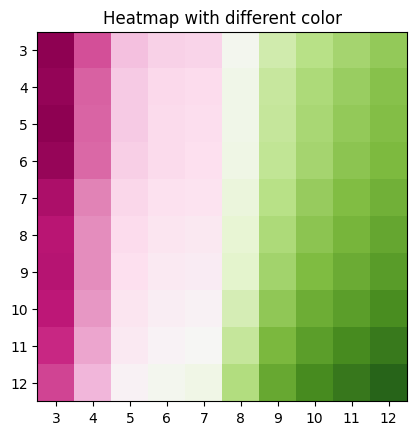

In [150]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.set_xticks(np.arange(10) , minor=False)
ax.set_yticks(np.arange(10) , minor=False)
ax.invert_yaxis()

plt.imshow(arr, cmap = "PiYG")
column_labels = [3,4,5,6,7,8,9,10,11,12]
row_labels = [3,4,5,6,7,8,9,10,11,12]
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

plt.title("Heatmap with different color")
plt.show()

In [151]:
step = 30
normal = []

initial = 0
for k in range(len(data)):
        initial+=data[k].iloc[360]['Close']

for i in range(360,1600,step):
    summer = 0
    for k in range(len(data)):
        summer+=data[k].iloc[i]['Close']
    normal.append(summer/initial)

In [152]:
def plotter(j,k,step,data):
    arr1 = func(j,k,data)
    #print(arr1[:])
    graph = []
    for i in range(j-1, len(arr1)):
        ans = 0
        for _ in range(j):
            ans+=arr1[i - _]
        graph.append(ans)
    
    return graph

In [153]:
graph1 = plotter(3,3,step,data)
graph2 = plotter(12,12,step,data)
graph3 = plotter(6,6,step,data)

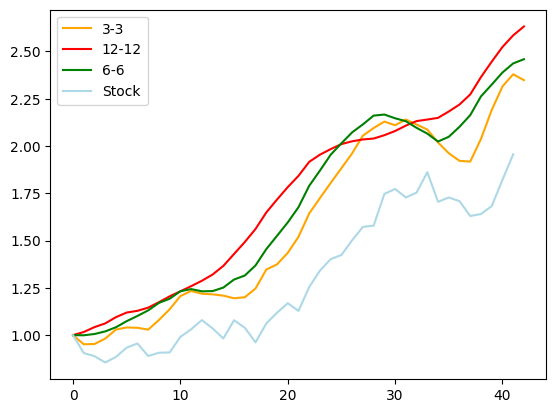

In [154]:
plt.plot(graph1, color='orange', label = "3-3")
plt.plot(graph2, color='red', label = "12-12")
plt.plot(graph3, color = 'green', label = "6-6")
plt.plot(normal, color = 'lightblue', label = "Stock")

plt.legend()
plt.show()